<h1>Sentiment Analysis</h1>

<h5>All import</h5>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords


<h4>Load Data</h4>

In [160]:
# Load the data
data = pd.read_csv('..data//raw_sentiment_data.csv')

data.head()


,Comment
0,"I love this product, it's amazing!"
1,This is the worst experience I've ever had.
2,"It's okay, nothing special."
3,Absolutely fantastic! I would buy it again.
4,I'm really disappointed with the quality.


In [161]:
# Check for missing values
data.isnull().sum()

# Drop missing values
data = data.dropna()

<h4>Preprocess the Text Data</h4>

In [162]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
print(data.columns)


Index(['Comment'], dtype='object')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
def clean_text(text):
    text = text.lower()   # Convert to lowercase for example: "Hello" -> "hello"
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation for example: "I'm" -> "Im"    
    text = re.sub(r'\d+', '', text)  # Remove numbers for example: "I have 2 dogs" -> "I have dogs"
    text = ' '.join([word for word in text.split() if word not in stop])   # Remove stopwords for example: "I am a student" -> "student"
    return text

data['cleaned_text'] = data['Comment'].apply(clean_text)  # Apply the clean_text function to the 'Comment' column

In [164]:
data.head()

,Comment,cleaned_text
0,"I love this product, it's amazing!",love product amazing
1,This is the worst experience I've ever had.,worst experience ive ever
2,"It's okay, nothing special.",okay nothing special
3,Absolutely fantastic! I would buy it again.,absolutely fantastic would buy
4,I'm really disappointed with the quality.,im really disappointed quality


<h4 style='font-weight:bold; color:#718093'>Perform Sentiment Analysis</h4>

In [165]:
from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)  # Create a TextBlob object
    if analysis.sentiment.polarity > 0:  # Check the polarity of the sentiment
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)
print(data['sentiment'].value_counts())


sentiment
Positive    5
Negative    4
Neutral     1
Name: count, dtype: int64


<h5>Printing the sentiment</h5>

In [166]:
print(data[['Comment', 'sentiment']].head(10))

                                       Comment sentiment
0           I love this product, it's amazing!  Positive
1  This is the worst experience I've ever had.  Negative
2                  It's okay, nothing special.  Positive
3  Absolutely fantastic! I would buy it again.  Positive
4    I'm really disappointed with the quality.  Negative
5                Not bad, but could be better.  Negative
6                       Such a waste of money!  Negative
7                   Great value for the price.  Positive
8       I don't know what to think about this.   Neutral
9       Excellent service, highly recommended!  Positive


<h4 style='font-weight:bold; color:#718093'>Visualization Sentiment Analysis</h4>

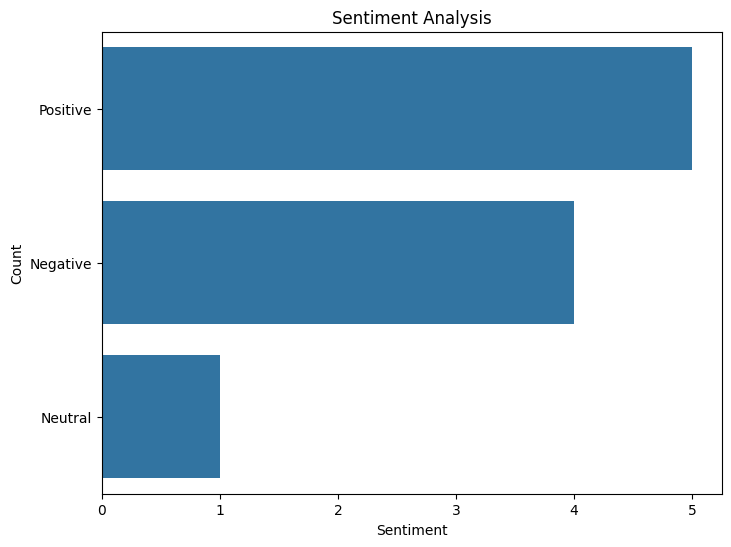

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data['sentiment'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()